In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(trainImages[0])

trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 255
print(trainImages[0])

NUM_DIGITS = 10
trainLabels = to_categorical(train_labels, NUM_DIGITS)
testLabels = to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[0])

model = Sequential()
model.add(Dense(units=200, activation=tf.nn.relu, input_shape=(FLATTEN_DIM,)))
model.add(Dense(units=200, activation=tf.nn.relu))
model.add(Dense(units=10, activation=tf.nn.softmax))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
tbCallback = TensorBoard(log_dir="./logs/demo70", histogram_freq=0,
                         write_graph=True, write_images=True)
model.fit(trainImages, trainLabels, epochs=20, callbacks=[tbCallback])


(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   

In [2]:
predictedLabels = model.predict_classes(testImages)
predictedLabels[:10]

c:\users\admin\envs\tf_ml_ds_37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [3]:
predicted = model.predict(testImages)
predicted[:10]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1473984e-37, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.1488971e-31, 1.0000000e+00, 8.8400213e-18, 1.1741931e-27,
        2.2015103e-13, 3.0760225e-24, 3.5570772e-24, 1.1362693e-15,
        5.6479789e-20, 5.6649951e-23],
       [1.0000000e+00, 2.1827821e-25, 2.4004889e-13, 2.5259679e-15,
        1.2576616e-18, 1.8836119e-13, 2.2068181e-11, 1.4850913e-17,
        1.8671407e-16, 9.9023003e-14],
       [2.3238868e-33, 0.0000000e+00, 3.2115074e-30, 0.0000000e+00,
        1.0000000e+00, 2.4377627e-34, 4.4062862e-30, 5.5852469e-27,
        1.6133362e-33, 5.0186500e-19],
       [1.2584218e-30, 1.0000000e+00, 2.0919202e-16, 2.6528102e-24,
        3.0439979e-09, 1.3502204e-27, 2.5183518e-27, 2.99

In [4]:
predicted_prob = model.predict_proba(testImages)
predicted_prob[:10]

c:\users\admin\envs\tf_ml_ds_37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1473984e-37, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.1488971e-31, 1.0000000e+00, 8.8400213e-18, 1.1741931e-27,
        2.2015103e-13, 3.0760225e-24, 3.5570772e-24, 1.1362693e-15,
        5.6479789e-20, 5.6649951e-23],
       [1.0000000e+00, 2.1827821e-25, 2.4004889e-13, 2.5259679e-15,
        1.2576616e-18, 1.8836119e-13, 2.2068181e-11, 1.4850913e-17,
        1.8671407e-16, 9.9023003e-14],
       [2.3238868e-33, 0.0000000e+00, 3.2115074e-30, 0.0000000e+00,
        1.0000000e+00, 2.4377627e-34, 4.4062862e-30, 5.5852469e-27,
        1.6133362e-33, 5.0186500e-19],
       [1.2584218e-30, 1.0000000e+00, 2.0919202e-16, 2.6528102e-24,
        3.0439979e-09, 1.3502204e-27, 2.5183518e-27, 2.99

In [5]:
import matplotlib.pyplot as plt
def plotTestImage(index):
    plt.title("test image marked as %d, predict as %d"%(test_labels[index],predictedLabels[index]))
    plt.imshow(test_images[index],cmap='binary')
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

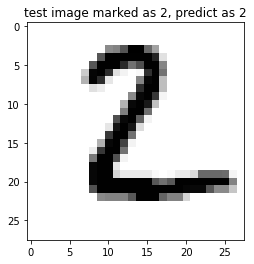

In [8]:
plotTestImage(1)

In [7]:
import pandas as pd
pd.crosstab(test_labels, predictedLabels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,1,0,2,3,1,2,1,2,0
1,0,1124,3,1,1,1,1,2,2,0
2,1,0,1013,2,6,0,0,6,4,0
3,2,0,8,987,0,3,0,5,4,1
4,0,0,4,0,973,0,2,1,0,2
5,2,0,0,7,0,876,1,1,3,2
6,3,2,2,1,12,12,923,0,3,0
7,0,2,6,0,2,0,0,1014,3,1
8,2,2,3,6,3,4,0,4,947,3


In [10]:
measure1 = pd.DataFrame({'label':test_labels,'predict':predictedLabels})
measure1[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [17]:
errors = measure1[(measure1.label==3)&(measure1.predict==5)]

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

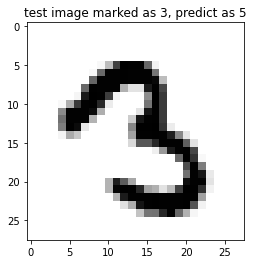

In [14]:
plotTestImage(6045)

449


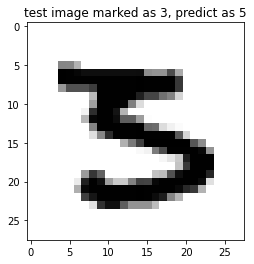

3943


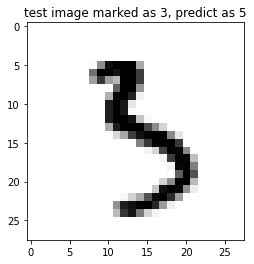

6045


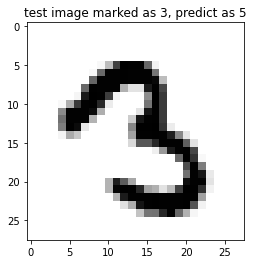

In [18]:
for errId in errors.index:
    print(errId)
    plotTestImage(errId)
    plt.show()